# <font color=blue>Assignments for "Assumptions of Linear Regression"</font>

To close out this lesson, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit a link to a single Gist file that contains links to the two notebooks.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

## 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from [Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [ ]:
import pandas as pd
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


- Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing* and *pressure*. Estimate the model using OLS.

In [ ]:
y = weather_df['Temperature (C)']
X = weather_df[['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']]

lrm = LinearRegression()

lrm.fit(X, y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

predictions = lrm.predict(X)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.926438185285384


- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

#### 1. Assumption one: linearity of the model in the coefficients

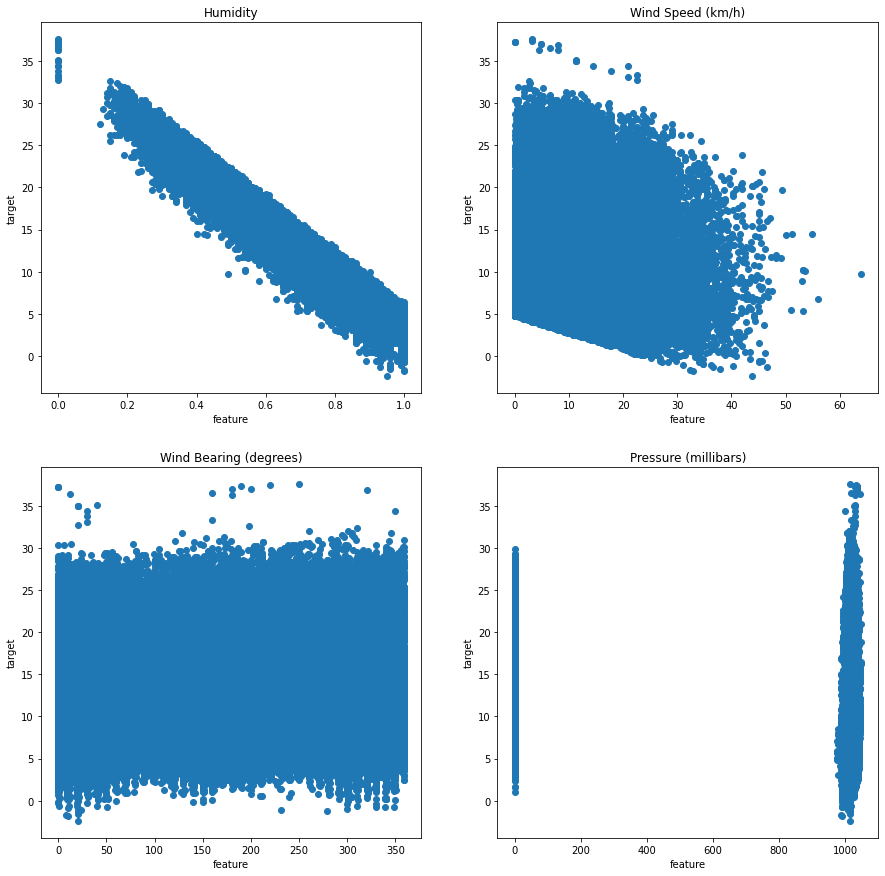

In [ ]:
# we plot the estimated Y and X
# the relationship should be quadratic
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.scatter(X['Humidity'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Humidity")

plt.subplot(2, 2, 2)
plt.scatter(X['Wind Speed (km/h)'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Wind Speed (km/h)")

plt.subplot(2, 2, 3)
plt.scatter(X['Wind Bearing (degrees)'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Wind Bearing (degrees)")

plt.subplot(2, 2, 4)
plt.scatter(X['Pressure (millibars)'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("Pressure (millibars)")

plt.show()

We can say that Humidity is clearly linear and Wind speed also seems to be linear. However, Wind Bearing and Pressure doesn't look linear.

#### 2. Assumption two: the error term should be zero on average

In [ ]:
predictions = lrm.predict(X)
errors = y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -2.5354426101856083e-15


#### 3. Assumption three: homoscedasticity

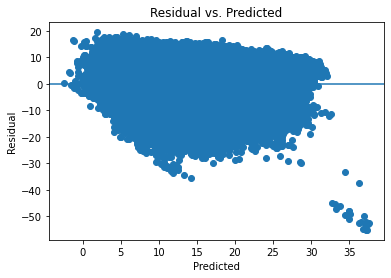

In [ ]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The p-values of both tests are lower than 0.05. So, the test results reject the null hypothesis which means our errors are heteroscedastic.

#### 4. Assumption four: low multicollinearity

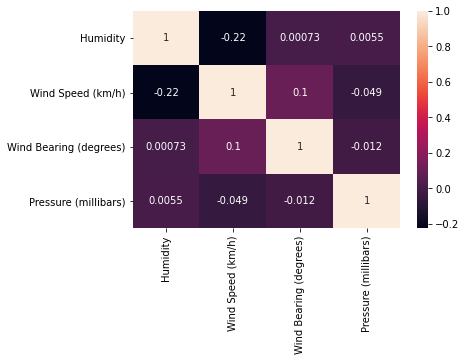

In [ ]:
sns.heatmap(X.corr(), annot=True)
plt.show()


As we can observe here, there are no high correlations between any of the variables. Therefore, there is no multicollinearity.


#### 5. Assumption five: error terms should be uncorrelated with one other

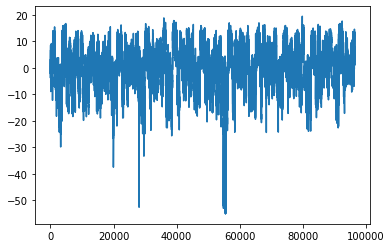

In [ ]:
plt.plot(errors)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


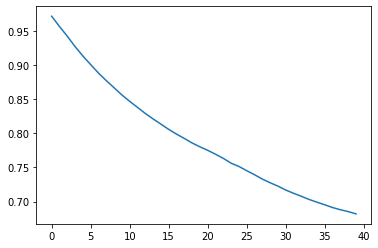

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The autocorrelation between the errors of the model is ranging between 1 and 0.65, which indicates that there may be a correlation between error terms.

#### 6. Assumption six: features shouldn't be correlated with the errors

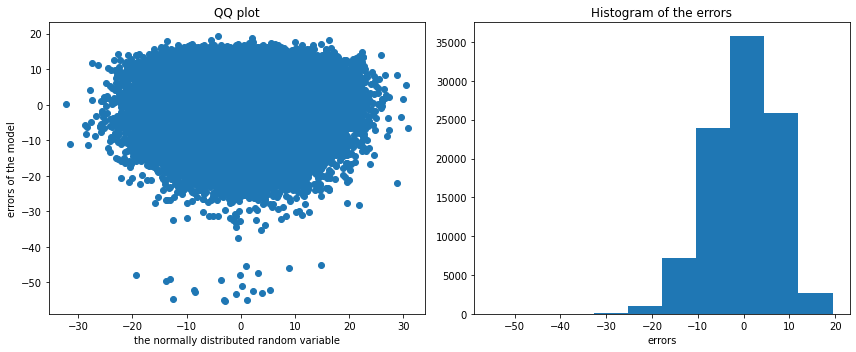

In [ ]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [ ]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252353 and p value is 0.0
Normality test statistics is 3375.4323076995734 and p value is 0.0


The p-values of both tests indicate that our errors are not normally distributed.

## 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [ ]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Reimplement the model you built in the previous lesson. 

In [ ]:
df_null = house_prices_df.isnull().sum() / len(house_prices_df)
house_prices_df.drop(df_null[df_null > .1].index, axis=1, inplace=True)
house_prices_df.dropna(inplace=True)

In [ ]:
cols=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt','YearRemodAdd']
df_train = house_prices_df[cols]

In [ ]:
MSZoning = pd.get_dummies(house_prices_df['MSZoning'], drop_first=True)
Street = pd.get_dummies(house_prices_df['Street'], drop_first=True)
BsmtQual = pd.get_dummies(house_prices_df['BsmtQual'], drop_first=True)
SaleCondition = pd.get_dummies(house_prices_df['SaleCondition'], drop_first=True)

In [ ]:
scaler = StandardScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns, index=df_train.index)


In [ ]:
X = pd.concat([df_train, MSZoning, Street, BsmtQual,SaleCondition],axis =1)
X.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,FV,RH,RL,RM,Pave,Fa,Gd,TA,AdjLand,Alloca,Family,Normal,Partial
0,0.589337,0.331321,0.202747,-0.591875,0.775560,1.014157,0.854216,0,0,1,0,1,0,1,0,0,0,0,1,0
1,-0.165963,-0.529579,0.202747,0.409598,0.775560,0.100528,-0.476562,0,0,1,0,1,0,1,0,0,0,0,1,0
2,0.589337,0.477367,0.202747,-0.434007,0.775560,0.946480,0.804928,0,0,1,0,1,0,1,0,0,0,0,1,0
3,0.589337,0.344773,1.779928,-0.838543,-1.051375,-1.963596,-0.772291,0,0,1,0,1,0,0,1,0,0,0,0,0
4,1.344638,1.269088,1.779928,0.120996,0.775560,0.912642,0.706352,0,0,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
y = house_prices_df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [ ]:
# Using Scikit-Learn
lrm = LinearRegression()

lrm.fit(X, y)

print('Coefficients: {}\n'.format(lrm.coef_))
print('Intercept: {}'.format(lrm.intercept_))

predictions = lrm.predict(X)

Coefficients: [ 23623.15122788  27766.06072178   9197.94770295   8882.97447453
  -3428.49192848   2346.10489565   6115.18722438  23158.14229276
  17477.70990918  29326.82947861  10150.89011005  -7421.82804816
 -48699.39774421 -44902.78166648 -45984.76624814  21652.1965377
  12470.77598033  -6742.60025748   7992.67537974  15750.26650955]

Intercept: 201583.7214678295


- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

#### 1. Assumption one: linearity of the model in the coefficients

In [ ]:
df_train.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
0,0.589337,0.331321,0.202747,-0.591875,0.775560,1.014157,0.854216
1,-0.165963,-0.529579,0.202747,0.409598,0.775560,0.100528,-0.476562
2,0.589337,0.477367,0.202747,-0.434007,0.775560,0.946480,0.804928
3,0.589337,0.344773,1.779928,-0.838543,-1.051375,-1.963596,-0.772291
4,1.344638,1.269088,1.779928,0.120996,0.775560,0.912642,0.706352


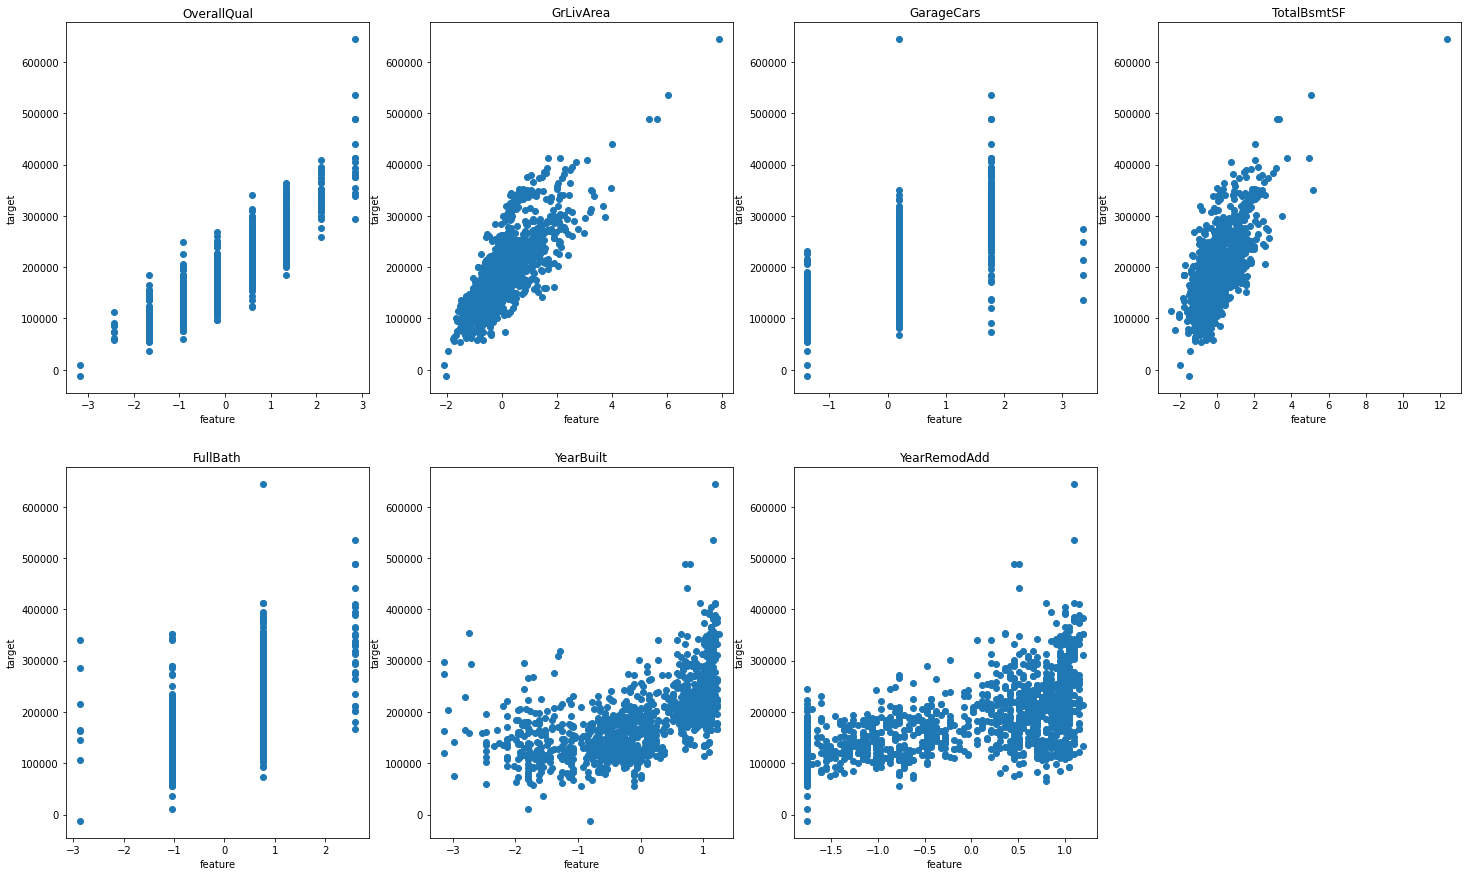

In [ ]:
plt.figure(figsize=(25, 15))

plt.subplot(2, 4, 1)
plt.scatter(df_train['OverallQual'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("OverallQual")

plt.subplot(2, 4, 2)
plt.scatter(df_train['GrLivArea'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("GrLivArea")

plt.subplot(2, 4, 3)
plt.scatter(df_train['GarageCars'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("GarageCars")

plt.subplot(2, 4, 4)
plt.scatter(df_train['TotalBsmtSF'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("TotalBsmtSF")

plt.subplot(2, 4, 5)
plt.scatter(df_train['FullBath'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("FullBath")

plt.subplot(2, 4, 6)
plt.scatter(df_train['YearBuilt'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("YearBuilt")

plt.subplot(2, 4, 7)
plt.scatter(df_train['YearRemodAdd'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title("YearRemodAdd")

plt.show()

#### 2. Assumption two: the error term should be zero on average

In [ ]:
predictions = lrm.predict(X)
errors = y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -1.061484997226162e-11


#### 3. Assumption three: homoscedasticity

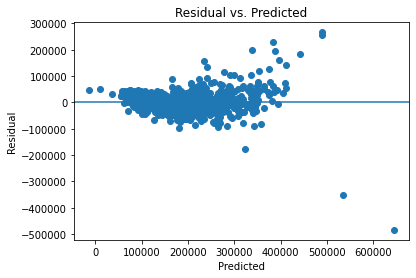

In [ ]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 555.141 and p value is 9.58e-123
Levene test statistic value is 447.774 and p value is 5.12e-92


#### 4. Assumption four: low multicollinearity

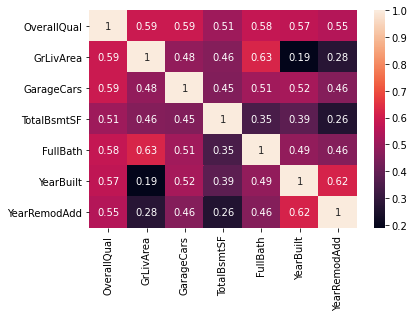

In [ ]:
sns.heatmap(df_train.corr(), annot=True)
plt.show()

#### 5. Assumption five: error terms should be uncorrelated with one other

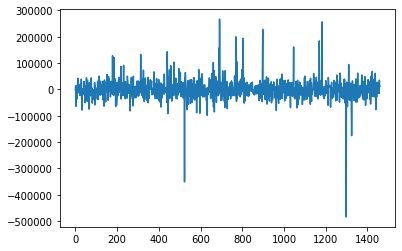

In [ ]:
plt.plot(errors)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


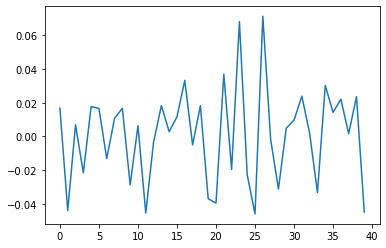

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The autocorrelation between the errors of our house price model is very low (ranging between -0.05 and 0.07).

#### 6. Assumption six: features shouldn't be correlated with the errors

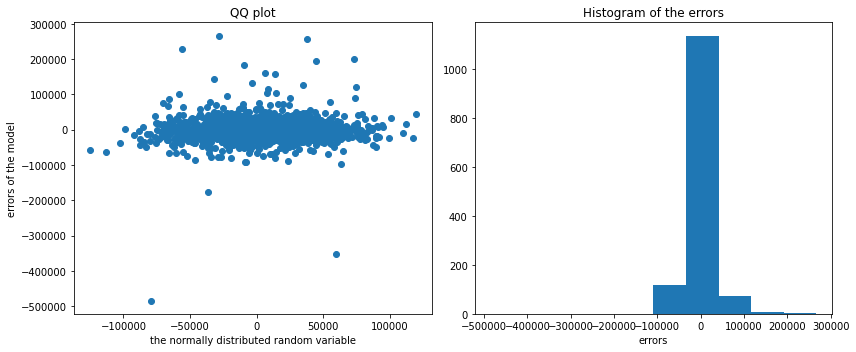

In [ ]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, errors)
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [ ]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 81591.50831726109 and p value is 0.0
Normality test statistics is 638.9171108404018 and p value is 1.8235269418733317e-139


The p-values of both tests indicate that our errors are not normally distributed.